In [6]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile('Paignton Zoo Footfall 2018 2024.xlsx')

# Get the sheet names
sheet_names = excel_file.sheet_names
print(sheet_names)

# Read a specific sheet into a DataFrame
pz = pd.read_excel(excel_file, sheet_name='Paignton Footfall')
print(pz.head())


['Instructions', 'Paignton Summary', 'Paignton Footfall']
        Date Financial Year  Year  Month Month Text  Day  Admissions\nAdult  \
0 2018-11-01        2018/19  2018     11        Nov    1              396.0   
1 2018-11-02        2018/19  2018     11        Nov    2              262.0   
2 2018-11-03        2018/19  2018     11        Nov    3              426.0   
3 2018-11-04        2018/19  2018     11        Nov    4              133.0   
4 2018-11-05        2018/19  2018     11        Nov    5              134.0   

   Admissions\nChild  Education\nAdult Education\nChild  Family\nAdult  \
0              139.0              33.0               83          120.0   
1               77.0              12.0               41           76.0   
2               82.0               1.0                1           78.0   
3               29.0               0.0                0           14.0   
4               15.0              12.0               39           10.0   

   Family\nChild  Unpa

In [7]:
pz.head()

,Date,Financial Year,Year,Month,Month Text,Day,Admissions\nAdult,Admissions\nChild,Education\nAdult,Education\nChild,Family\nAdult,Family\nChild,Unpaids\nAdult,Unpaids\nChild,Annual Members\nAdult,Annual Members\nChild,Total,Total Exc. Education
0,2018-11-01,2018/19,2018,11,Nov,1,396.0,139.0,33.0,83,120.0,120.0,36.0,8.0,134.0,38.0,1107,991
1,2018-11-02,2018/19,2018,11,Nov,2,262.0,77.0,12.0,41,76.0,76.0,31.0,0.0,176.0,36.0,787,734
2,2018-11-03,2018/19,2018,11,Nov,3,426.0,82.0,1.0,1,78.0,78.0,36.0,5.0,267.0,140.0,1114,1112
3,2018-11-04,2018/19,2018,11,Nov,4,133.0,29.0,0.0,0,14.0,14.0,8.0,4.0,157.0,78.0,437,437
4,2018-11-05,2018/19,2018,11,Nov,5,134.0,15.0,12.0,39,10.0,10.0,12.0,1.0,119.0,12.0,364,313


In [10]:
pz.columns = [
    'Date', 'Financial Year', 'Year', 'Month', 'Month Text', 'Day', 
    'Admissions Adult', 'Admissions Child', 'Education Adult', 'Education Child', 
    'Family Adult', 'Family Child', 'Unpaids Adult', 'Unpaids Child', 
    'Annual Members Adult', 'Annual Members Child', 'Total', 'Total Excl Education'
]

# Convert the 'Date' column to datetime format
pz['Date'] = pd.to_datetime(pz['Date'], format='%Y-%m-%d')

# Check for missing values
missing_values = pz.isnull().sum()

# Display the DataFrame info to verify data types and missing values
df_info = pz.info()

print(missing_values)
print(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3270 non-null   datetime64[ns]
 1   Financial Year        2191 non-null   object        
 2   Year                  3270 non-null   int64         
 3   Month                 3270 non-null   int64         
 4   Month Text            3270 non-null   object        
 5   Day                   3270 non-null   int64         
 6   Admissions Adult      1825 non-null   float64       
 7   Admissions Child      1826 non-null   float64       
 8   Education Adult       1822 non-null   float64       
 9   Education Child       1814 non-null   object        
 10  Family Adult          1824 non-null   float64       
 11  Family Child          1826 non-null   float64       
 12  Unpaids Adult         1826 non-null   float64       
 13  Unpaids Child     

In [11]:
print(pz.columns)

Index(['Date', 'Financial Year', 'Year', 'Month', 'Month Text', 'Day',
       'Admissions Adult', 'Admissions Child', 'Education Adult',
       'Education Child', 'Family Adult', 'Family Child', 'Unpaids Adult',
       'Unpaids Child', 'Annual Members Adult', 'Annual Members Child',
       'Total', 'Total Excl Education'],
      dtype='object')


In [13]:
numerical_columns = [
    'Admissions Adult', 'Admissions Child', 'Education Adult', 'Family Adult', 
    'Family Child', 'Unpaids Adult', 'Unpaids Child', 'Annual Members Adult', 
    'Annual Members Child'
]

pz[numerical_columns] = pz[numerical_columns].fillna(0)

# Convert 'Education Child' to numeric, replacing non-numeric values with NaN and then filling with 0
pz['Education Child'] = pd.to_numeric(pz['Education Child'], errors='coerce').fillna(0)

# Convert 'Financial Year' missing values to a placeholder (e.g., 'Unknown')
pz['Financial Year'] = pz['Financial Year'].fillna('Unknown')

# Verify the changes
cleaned_missing_values = pz.isnull().sum()
cleaned_pz_info = pz.info()

cleaned_missing_values, cleaned_pz_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3270 non-null   datetime64[ns]
 1   Financial Year        3270 non-null   object        
 2   Year                  3270 non-null   int64         
 3   Month                 3270 non-null   int64         
 4   Month Text            3270 non-null   object        
 5   Day                   3270 non-null   int64         
 6   Admissions Adult      3270 non-null   float64       
 7   Admissions Child      3270 non-null   float64       
 8   Education Adult       3270 non-null   float64       
 9   Education Child       3270 non-null   float64       
 10  Family Adult          3270 non-null   float64       
 11  Family Child          3270 non-null   float64       
 12  Unpaids Adult         3270 non-null   float64       
 13  Unpaids Child     

(Date                    0
 Financial Year          0
 Year                    0
 Month                   0
 Month Text              0
 Day                     0
 Admissions Adult        0
 Admissions Child        0
 Education Adult         0
 Education Child         0
 Family Adult            0
 Family Child            0
 Unpaids Adult           0
 Unpaids Child           0
 Annual Members Adult    0
 Annual Members Child    0
 Total                   0
 Total Excl Education    0
 dtype: int64,
 None)

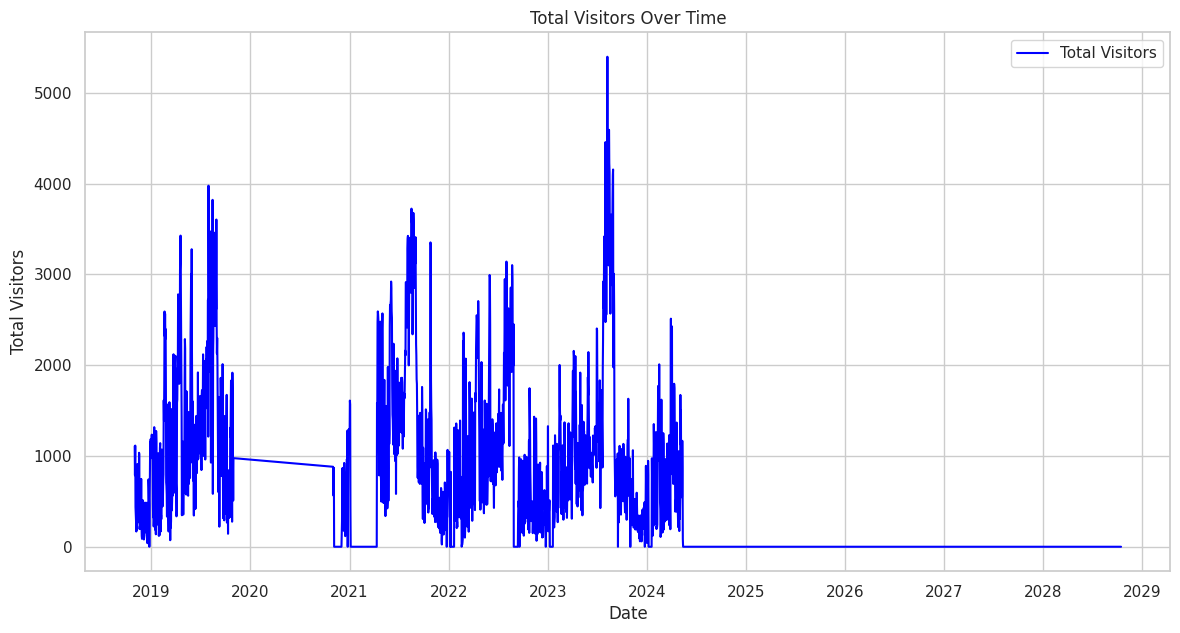

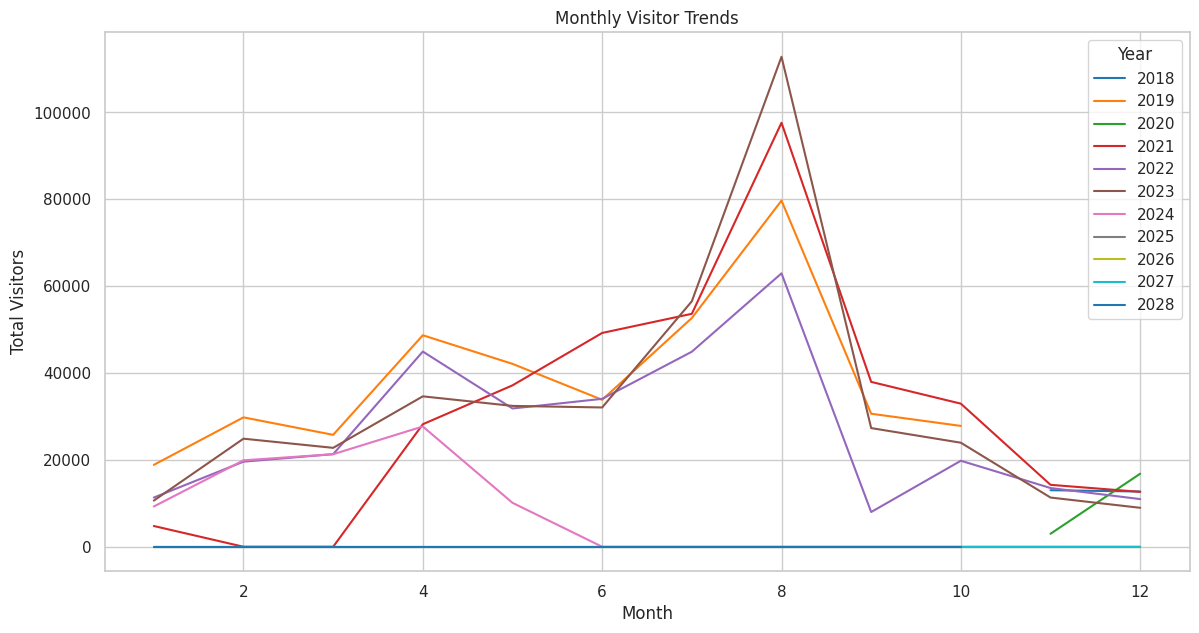

/tmp/ipykernel_103/3607925055.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visitor_totals, x='Category', y='Total', palette='viridis')


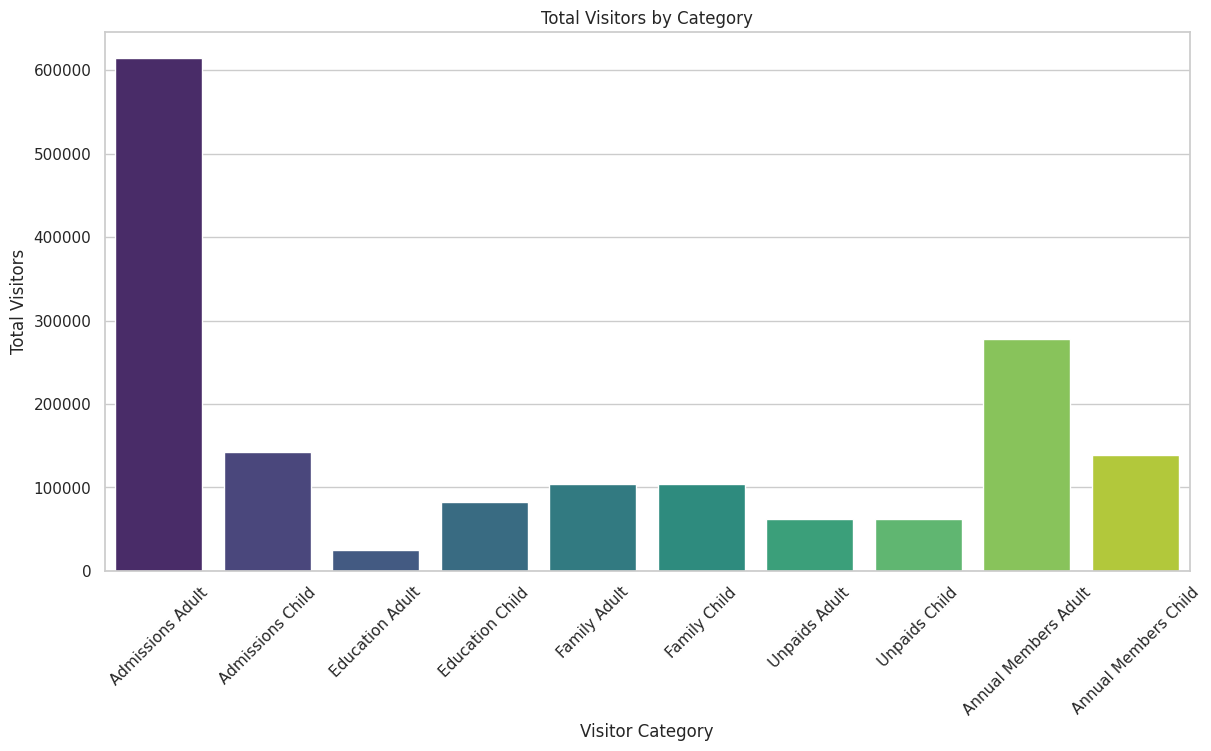

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot total visitors over time
plt.figure(figsize=(14, 7))
plt.plot(pz['Date'], pz['Total'], label='Total Visitors', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.title('Total Visitors Over Time')
plt.legend()
plt.show()

# Analyze monthly visitor trends
monthly_totals = pz.groupby(['Year', 'Month'])['Total'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_totals, x='Month', y='Total', hue='Year', palette='tab10')
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.title('Monthly Visitor Trends')
plt.legend(title='Year')
plt.show()

# Examine the distribution of visitor categories
visitor_categories = [
    'Admissions Adult', 'Admissions Child', 'Education Adult', 'Education Child', 
    'Family Adult', 'Family Child', 'Unpaids Adult', 'Unpaids Child', 
    'Annual Members Adult', 'Annual Members Child'
]

visitor_totals = pz[visitor_categories].sum().reset_index()
visitor_totals.columns = ['Category', 'Total']

plt.figure(figsize=(14, 7))
sns.barplot(data=visitor_totals, x='Category', y='Total', palette='viridis')
plt.xlabel('Visitor Category')
plt.ylabel('Total Visitors')
plt.title('Total Visitors by Category')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


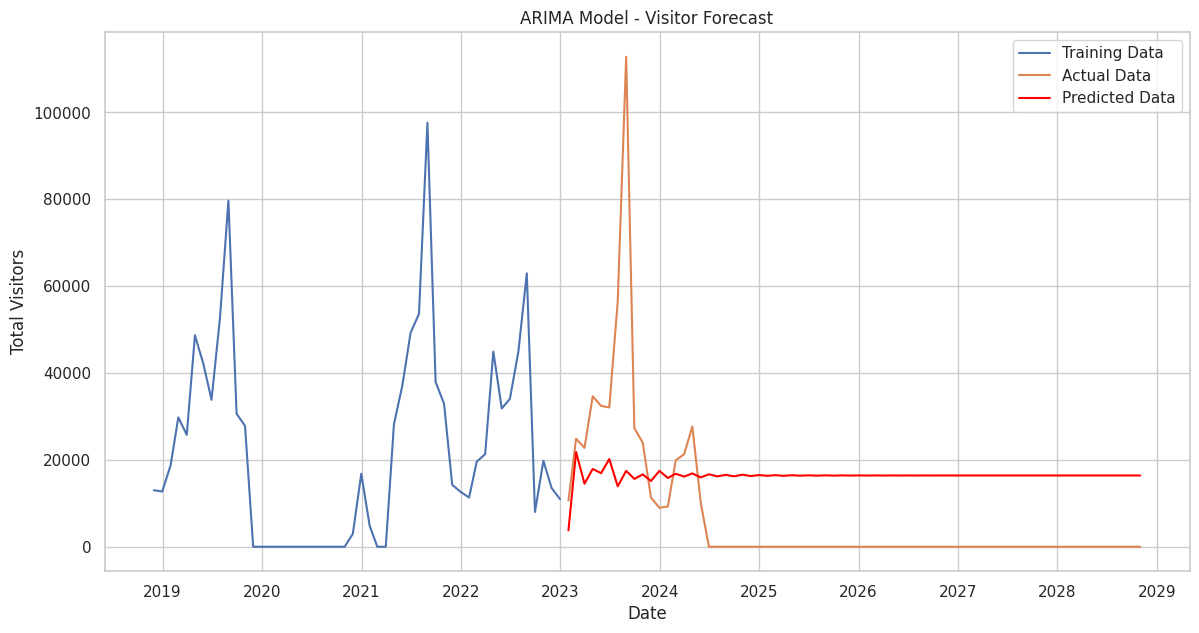

Root Mean Squared Error: 19445.139485719883


In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

monthly_visitors = pz.resample('M', on='Date')['Total'].sum().reset_index()

# Split the data into training and test sets
train_df = monthly_visitors[monthly_visitors['Date'] < '2023-01-01']
test_df = monthly_visitors[monthly_visitors['Date'] >= '2023-01-01']

# Fit the ARIMA model on the training data
arima_model = ARIMA(train_df['Total'], order=(5, 1, 0))
arima_result = arima_model.fit()

# Make predictions on the test data
start_index = test_df.index[0]
end_index = test_df.index[-1]
arima_forecast = arima_result.predict(start=start_index, end=end_index, typ='levels')

# Calculate the mean squared error
mse = mean_squared_error(test_df['Total'], arima_forecast)
rmse = np.sqrt(mse)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df['Total'], label='Training Data')
plt.plot(test_df['Date'], test_df['Total'], label='Actual Data')
plt.plot(test_df['Date'], arima_forecast, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.title('ARIMA Model - Visitor Forecast')
plt.legend()
plt.show()

# Display the RMSE
print(f'Root Mean Squared Error: {rmse}')


In [19]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/7f/0a/28b3b3c807a518b7d0ed0ae45bfdd6be23b38a0c60790f90ce1f8383a640/statsmodels-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached statsmodels-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Extract and rename relevant columns
summary_df = summary_df.iloc[4:, [0, 1, 14, 15, 16]]  # Select relevant rows and columns
summary_df.columns = ['Month', 'Admissions Adult', 'Budget', 'Variance to Budget', 'Variance to Budget %']

# Reset the index for easier manipulation
summary_df.reset_index(drop=True, inplace=True)

# Drop any rows that are completely empty or NaN
summary_df.dropna(how='all', inplace=True)

# Convert relevant columns to numeric
summary_df['Admissions Adult'] = pd.to_numeric(summary_df['Admissions Adult'], errors='coerce')
summary_df['Budget'] = pd.to_numeric(summary_df['Budget'], errors='coerce')
summary_df['Variance to Budget'] = pd.to_numeric(summary_df['Variance to Budget'], errors='coerce')
summary_df['Variance to Budget %'] = pd.to_numeric(summary_df['Variance to Budget %'], errors='coerce')

# Display the cleaned DataFrame
summary_df.head()


NameError: name 'summary_df' is not defined